In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import matplotlib
import math
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [2]:
# Produce a random walk process in 2-dimensional space

x_size = 500
y_size = 500

st_x = random.randint(1,x_size) # avoid starting on edges
st_y = random.randint(1,x_size)

n_steps = 2000
ss = 20 # step size

pos_x = np.zeros(n_steps,dtype = int)
pos_y = np.zeros(n_steps,dtype = int)
pos_x[0] = st_x
pos_y[0] = st_y

In [3]:
def rand_walk(n_steps,x_size=500,y_size=500,ss=20,normalize = True,st_pts = (),use_gauss =(),use_cauchy =()):
    if not st_pts:
        st_x = random.randint(1,x_size) # avoid starting on edges
        st_y = random.randint(1,x_size)
    else:
        st_x,st_y = st_pts
    pos_x = np.zeros(n_steps,dtype = float)
    pos_y = np.zeros(n_steps,dtype = float)
    pos_x[0] = st_x
    pos_y[0] = st_y
    
    for i in range(n_steps-1):
        THETA = 2*math.pi*random.rand()
        if use_gauss: ss = np.abs(random.normal(0,use_gauss))
        if use_cauchy and not(use_gauss): ss = np.abs(cauchy_cdf(random.uniform(),use_cauchy))
        d_x = ss*np.cos(THETA)
        d_y =  ss*np.sin(THETA)
        x_prime = round(pos_x[i] +d_x)
        y_prime = round(pos_y[i] +d_y)

        while (x_prime >x_size) or (x_prime < 0) or (y_prime >y_size) or  (y_prime < 0):
            if x_prime >x_size:
                x_prime = x_size - (x_prime-x_size)
            if x_prime < 0:
                x_prime = 0+(0-x_prime)
            if y_prime >y_size:
                y_prime = y_size - (y_prime-y_size)
            if y_prime < 0:
                y_prime = 0+(0-y_prime)
            
        pos_x[i+1] = x_prime
        pos_y[i+1] = y_prime
    if normalize:
        pos_x = np.divide(pos_x,x_size)
        pos_y = np.divide(pos_y,y_size)
    return pos_x, pos_y


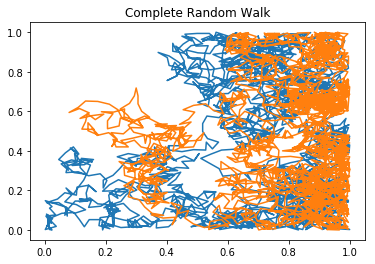

In [4]:
tr0 = rand_walk(n_steps,x_size,y_size,ss)
tr1 = rand_walk(n_steps,x_size,y_size,ss)


plt.plot(tr0[0],tr0[1])
plt.plot(tr1[0],tr1[1])
plt.title('Complete Random Walk')
plt.show()


In [5]:
def rand_walk_reinit(set_len = 20,n_set = 20,nan_space = True):
    if nan_space: n_pos = (set_len+1)*n_set
    else:  n_pos = set_len*n_set
    pos_y = np.empty(n_pos,dtype = float)
    pos_y.fill(np.nan)
    pos_x = np.empty(n_pos,dtype = float)
    pos_x.fill(np.nan) 
    
    for i in range(n_set):
        if nan_space: win = np.arange(i*set_len+i,(i+1)*set_len+i)
        else: win = np.arange(i*set_len,(i+1)*set_len)
        pos_x[win],pos_y[win] = rand_walk(set_len)
    return pos_x, pos_y
    

In [5]:
tr2 = rand_walk_reinit()

plt.plot(tr2[0],tr2[1])
plt.title('Random Walk Restart')
plt.show()

NameError: name 'rand_walk_reinit' is not defined

In [8]:
def draw_gauss(scale,cent,sd=3):
    nx = scale
    ny = scale
    RF = np.zeros((nx,ny))
    
    for x in range(nx):
        for y in range(ny):
            disp = cent - [x,y]
            dist = np.sqrt(np.sum((disp)**2))
            val = 1*np.exp(-dist**2/(2*sd**2))
            RF[y,x] += val
    return RF

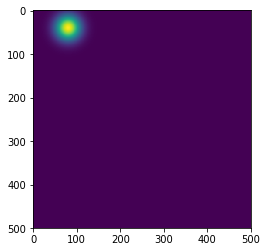

In [9]:
RF = draw_gauss(500,np.array([80,40]),20)
plt.imshow(RF)

In [ ]:
def pdist(pos1,pos2):
    disp = pos1-pos2
    dist = np.sqrt(np.sum((disp)**2))
    return dist

In [ ]:
def draw_gausses(scale,centers,stds):
    nx = scale
    ny = scale
    RF = np.zeros((nx,ny))
    ng = np.shape(hubs)[1]
    for x in range(nx):
        for y in range(ny):
            val = 0
            for g in range(ng):
                val += gauss(pdist([x,y],centers[:,g]),stds[g])
                RF[x,y] = val
    return RF
def gauss(x,c=1,a=1,b=0): # x
    return a*np.exp(-((x-b)**2)/(2*c**2))

In [6]:
# create density grid
scale = 500
n_clusters = 10
hubs = np.random.uniform(size=(2,n_clusters))*scale
std = np.random.uniform(10,100,n_clusters)

In [7]:
def simulate_density_clusters(scale,n_clusters,normalize=True):
    hubs = np.random.uniform(size=(2,n_clusters))*scale
    std = np.random.uniform(10,100,n_clusters)
    RF = draw_gausses(500,hubs,std)
    if normalize:
        RF = np.divide(RF,np.sum(RF))
    return RF

In [15]:
RF = simulate_density_clusters(scale,12)

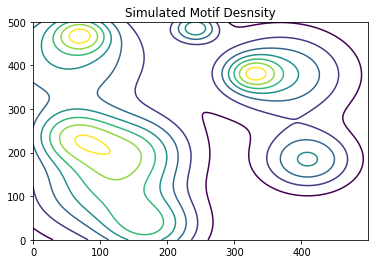

In [17]:
plt.contour(RF)
plt.title('Simulated Motif Desnsity')
plt.show()

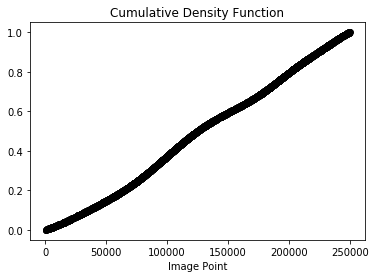

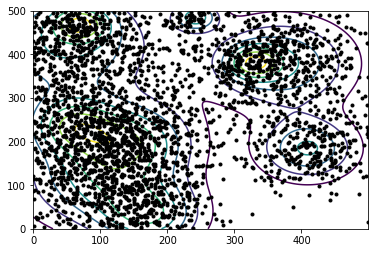

In [54]:
def weighted_point(RF,n_points):
    nx,ny = np.shape(RF)
    fRF = RF.flatten()
    CDF = np.cumsum(fRF)
    y_pos = np.random.uniform(size=n_points)
    x_pos = np.zeros(n_points)
    for i in range(n_points):
        bool_rank = np.nonzero(CDF>y_pos[i])[0]
        x_pos[i] = bool_rank[0]-1 # minus 1 to get index before sign change
    x_pos_og = ind_get(nx,x_pos)
    return CDF, x_pos, y_pos, x_pos_og

def ind_get(nx,x_pos): return x_pos//nx, (x_pos-1)%nx
    
CDF,x_pos,y_pos,x_og = weighted_point(RF,3000)
plt.plot(CDF)
plt.plot(x_pos,y_pos,'ko')
plt.title('Cumulative Density Function')
plt.xlabel('Image Point')
plt.show()

plt.contour(RF)
plt.plot(x_og[1],x_og[0],'k.')
plt.show()

In [131]:
# mapsf = maps.flatten()
# mapsf
def rand_walk_reinit_weight(RF,set_len = 20,n_set = 20,nan_space = True,use_gauss = (),use_cauchy=()):
    if nan_space: n_pos = (set_len+1)*n_set
    else:  n_pos = set_len*n_set
    pos_y = np.empty(n_pos,dtype = float)
    pos_y.fill(np.nan)
    pos_x = np.empty(n_pos,dtype = float)
    pos_x.fill(np.nan) 
    _,_,_,st_pos = weighted_point(RF,n_set)

        
    for i in range(n_set):
        if nan_space: win = np.arange(i*set_len+i,(i+1)*set_len+i)
        else: win = np.arange(i*set_len,(i+1)*set_len)
        pos_x[win],pos_y[win] = rand_walk(set_len,st_pts=(st_pos[0][i],st_pos[1][i]),use_gauss=use_gauss,use_cauchy=use_cauchy)
    return pos_x, pos_y
def cauchy_cdf(x,gamma): return gamma*np.tan(np.pi*(x-.5))


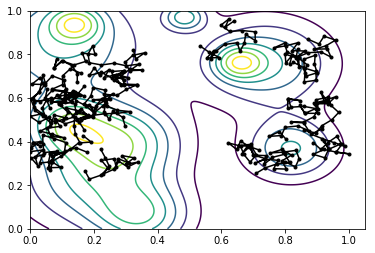

In [129]:
x_loc = rand_walk_reinit_weight(RF)
scl = np.arange(0,1,1.0/scale)
plt.contour(scl,scl,RF)
plt.plot(x_loc[1],x_loc[0],'.k-')
plt.show()

# Gauss random walk

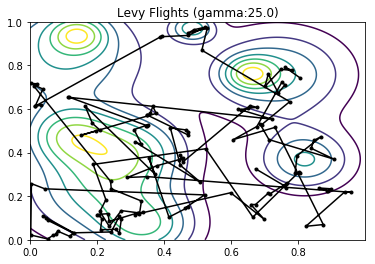

In [437]:
x_loc_g = rand_walk_reinit_weight(RF,set_len = 140,n_set = 1,nan_space = True,use_cauchy = 25.0) #cauchy/gauss
scl = np.arange(0,1,1.0/scale)
plt.contour(scl,scl,RF)
plt.plot(x_loc_g[1],x_loc_g[0],'.k-')
plt.title('Levy Flights (gamma:25.0)')
plt.show()

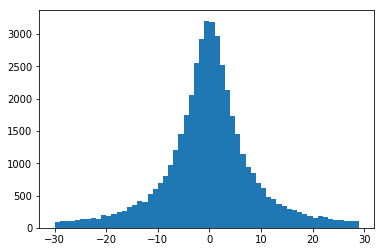

In [53]:
foo = cauchy_cdf(random.uniform(size=50000),5),disc_pts = False
plt.hist(foo,np.arange(-30,30))
plt.show()

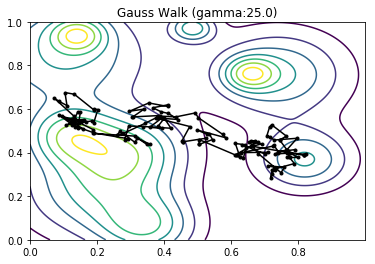

In [441]:
x_loc_g = rand_walk_reinit_weight(RF,set_len = 140,n_set = 1,nan_space = True,use_gauss = 25.0) #cauchy/gauss
scl = np.arange(0,1,1.0/scale)
plt.contour(scl,scl,RF)
plt.plot(x_loc_g[1],x_loc_g[0],'.k-')Flights
plt.title('Gauss Walk (gamma:25.0)')
plt.show()

# Load 2D data

In [2]:
d_loc = '/home/AD/tsheehan/data/all_points.npy'
dat2 = np.load(d_loc)

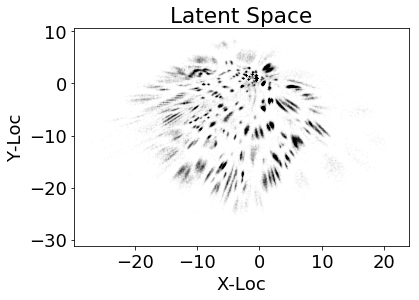

In [7]:
plt.scatter(dat2[:,0],dat2[:,1],color = 'k',alpha=.01,s=1)
plt.title('Latent Space')
plt.xlabel('X-Loc')
plt.ylabel('Y-Loc')
plt.show()

In [8]:
keep_x = np.array([-25,15])
keep_y = np.array([-25,10])
pt_keep = (dat2[:,0]>keep_x[0]) & (dat2[:,0]<keep_x[1]) & (dat2[:,1]>keep_y[0]) & (dat2[:,1]<keep_y[1])


In [11]:
def rand_walk_reinit_weight_disc(coords,set_len = 20,n_set = 20,nan_space = True,use_gauss = (),use_cauchy=()):
    if nan_space: n_pos = (set_len+1)*n_set
    else:  n_pos = set_len*n_set
    pos_y = np.empty(n_pos,dtype = float)
    pos_y.fill(np.nan)
    pos_x = np.empty(n_pos,dtype = float)
    pos_x.fill(np.nan) 
    dat_rng = rng(coords)

    st_pos = coords[rand_point(len(coords),n_set),:]

    for i in range(n_set):
        if nan_space: win = np.arange(i*set_len+i,(i+1)*set_len+i)
        else: win = np.arange(i*set_len,(i+1)*set_len)

        pos_x[win],pos_y[win] = rand_walk_cont(set_len,dat_rng,st_pts=(st_pos[i][0],st_pos[i][1]),use_gauss=use_gauss,use_cauchy=use_cauchy)
    return pos_x, pos_y

def rng(coords): return np.concatenate([np.ceil(np.max(coords,0)), np.floor(np.min(coords,0))],0)
def rand_point(n_pts,n_get): return np.round(random.uniform(0,n_pts,n_get)).astype(int)

In [12]:
def rand_walk_cont(n_steps,rng,st_pts = (),use_gauss =(),use_cauchy =()):
    
    st_x,st_y = st_pts
    pos_x = np.zeros(n_steps,dtype = float)
    pos_y = np.zeros(n_steps,dtype = float)
    pos_x[0] = st_x
    pos_y[0] = st_y
    
    for i in range(n_steps-1):
        THETA = 2*math.pi*random.rand()
        if use_gauss: ss = np.abs(random.normal(0,use_gauss))
        elif use_cauchy: ss = np.abs(cauchy_cdf(random.uniform(),use_cauchy))
        else: asf4 # error 
        d_x = ss*np.cos(THETA)
        d_y =  ss*np.sin(THETA)
        x_prime = pos_x[i] +d_x
        y_prime = pos_y[i] +d_y

        while (x_prime >rng[0]) or (x_prime < rng[2]) or (y_prime >rng[1]) or  (y_prime < rng[3]):
            if x_prime >rng[0]:
                x_prime = rng[0] - (x_prime-rng[0])
            if x_prime < rng[2]:
                x_prime = rng[2]+(rng[2]-x_prime)
            if y_prime >rng[1]:
                y_prime = rng[1] - (y_prime-rng[1])
            if y_prime < rng[3]:
                y_prime = rng[3]+(rng[3]-y_prime)
            
        pos_x[i+1] = x_prime
        pos_y[i+1] = y_prime
    return pos_x, pos_y


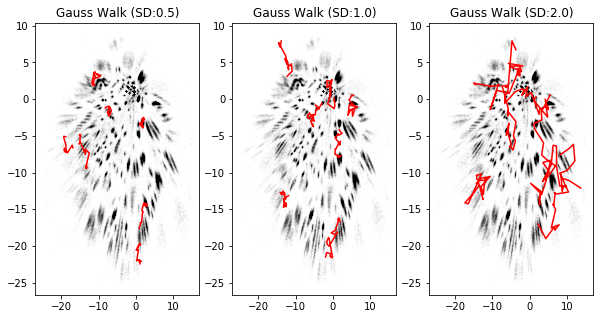

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 20,n_set = 7,nan_space = True,use_gauss = 0.5)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Gauss Walk (SD:0.5)')
plt.plot(trace_loc[0],trace_loc[1],'r')

plt.subplot(1,3,2)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 20,n_set = 7,nan_space = True,use_gauss = 1.0)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Gauss Walk (SD:1.0)')
plt.plot(trace_loc[0],trace_loc[1],'r')

plt.subplot(1,3,3)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 20,n_set = 7,nan_space = True,use_gauss = 2.0)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.plot(trace_loc[0],trace_loc[1],'r')
plt.title('Gauss Walk (SD:2.0)')
plt.show()

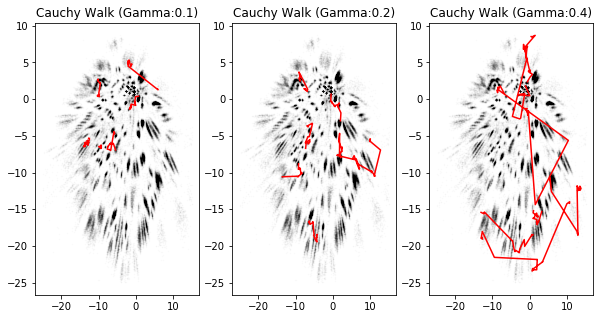

In [310]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 20,n_set = 7,nan_space = True,use_cauchy = 0.1)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Cauchy Walk (Gamma:0.1)')
plt.plot(trace_loc[0],trace_loc[1],'r')

plt.subplot(1,3,2)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 20,n_set = 7,nan_space = True,use_cauchy = 0.2)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Cauchy Walk (Gamma:0.2)')
plt.plot(trace_loc[0],trace_loc[1],'r')

plt.subplot(1,3,3)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 20,n_set = 7,nan_space = True,use_cauchy = 0.4)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Cauchy Walk (Gamma:0.4)')
plt.plot(trace_loc[0],trace_loc[1],'r')
plt.show()

# GAUSS Continuous

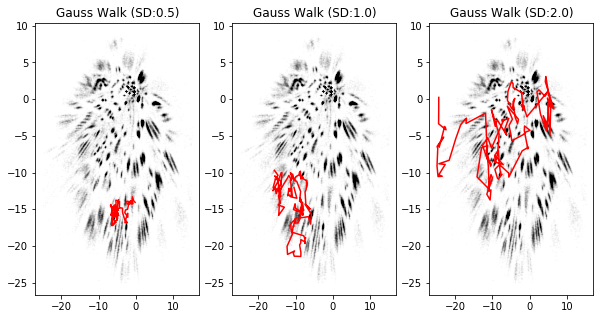

In [443]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 140,n_set = 1,nan_space = True,use_gauss = 0.5)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Gauss Walk (SD:0.5)')
plt.plot(trace_loc[0],trace_loc[1],'r')

plt.subplot(1,3,2)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 140,n_set = 1,nan_space = True,use_gauss = 1.0)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Gauss Walk (SD:1.0)')
plt.plot(trace_loc[0],trace_loc[1],'r')

plt.subplot(1,3,3)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 140,n_set = 1,nan_space = True,use_gauss = 2.0)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Gauss Walk (SD:2.0)')
plt.plot(trace_loc[0],trace_loc[1],'r')
plt.show()

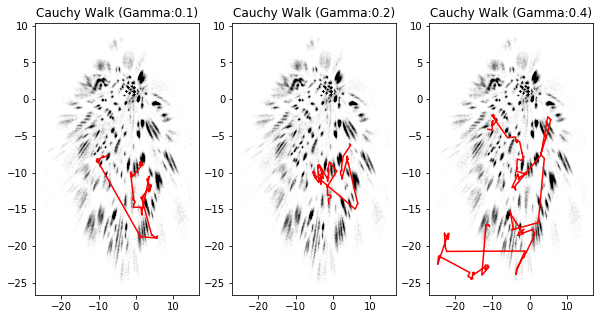

In [312]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 140,n_set = 1,nan_space = True,use_cauchy = 0.1)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Cauchy Walk (Gamma:0.1)')
plt.plot(trace_loc[0],trace_loc[1],'r')

plt.subplot(1,3,2)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 140,n_set = 1,nan_space = True,use_cauchy = 0.2)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Cauchy Walk (Gamma:0.2)')
plt.plot(trace_loc[0],trace_loc[1],'r')

plt.subplot(1,3,3)
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 140,n_set = 1,nan_space = True,use_cauchy = 0.4)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Cauchy Walk (Gamma:0.4)')
plt.plot(trace_loc[0],trace_loc[1],'r')
plt.show()

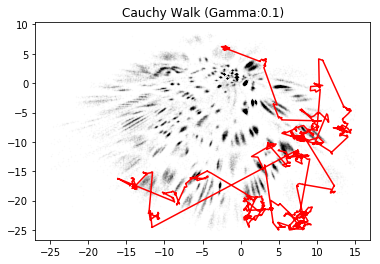

In [382]:
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 1400,n_set = 1,nan_space = True,use_cauchy = 0.1)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.title('Cauchy Walk (Gamma:0.1)')
plt.plot(trace_loc[0],trace_loc[1],'r')
plt.show()

# Select subspace

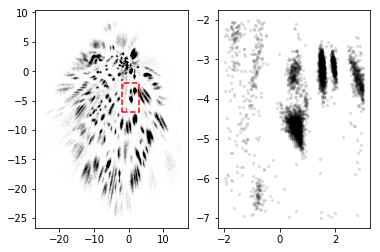

In [420]:
keep_x_sub = np.array([-2,3])
keep_y_sub = np.array([-7,-2])
pt_keep_sub = (dat2[:,0]>keep_x_sub[0]) & (dat2[:,0]<keep_x_sub[1]) & (dat2[:,1]>keep_y_sub[0]) & (dat2[:,1]<keep_y_sub[1])
plt.subplot(1,2,1)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.plot(keep_x_sub[[0,1,1,0,0]],keep_y_sub[[0,0,1,1,0]],'r--')
plt.subplot(1,2,2)
plt.scatter(dat2[pt_keep_sub,0],dat2[pt_keep_sub,1],color = 'k',alpha=.1,s=5)
plt.show()

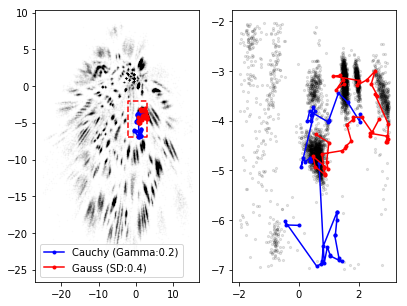

In [433]:
plt.figure(figsize=(10,5))
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep_sub,:],set_len = 20,n_set = 2,nan_space = True,use_gauss = 0.4)
trace_loc_c = rand_walk_reinit_weight_disc(dat2[pt_keep_sub,:],set_len = 20,n_set = 2,nan_space = True,use_cauchy = 0.2)
plt.subplot(1,3,1)
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
plt.plot(keep_x_sub[[0,1,1,0,0]],keep_y_sub[[0,0,1,1,0]],'r--')
plt.plot(trace_loc_c[0],trace_loc_c[1],'b.-',label='Cauchy (Gamma:0.2)')
plt.plot(trace_loc[0],trace_loc[1],'r.-',label='Gauss (SD:0.4)')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(dat2[pt_keep_sub,0],dat2[pt_keep_sub,1],color = 'k',alpha=.1,s=5)
plt.plot(trace_loc_c[0],trace_loc_c[1],'b.-')
plt.plot(trace_loc[0],trace_loc[1],'r.-')
plt.show()

In [447]:
x_sub_try = np.array([[-15,-10],[-5,0],[3,8]])
y_sub_try = np.array([[-7,-2],[0,5],[-12,-7]])

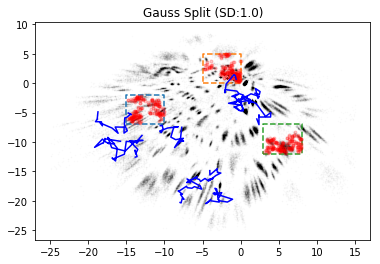

In [485]:
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.01,s=1)
for i in range(np.shape(x_sub_try)[0]):
    plt.plot(x_sub_try[i,[0,1,1,0,0]],y_sub_try[i,[0,0,1,1,0]],'--')
    pt_keep_sub = (dat2[:,0]>x_sub_try[i,0]) & (dat2[:,0]<x_sub_try[i,1]) & (dat2[:,1]>y_sub_try[i,0]) & (dat2[:,1]<y_sub_try[i,1])
    trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep_sub,:],set_len = 20,n_set = 10,nan_space = True,use_gauss = 0.4)
    plt.plot(trace_loc[0],trace_loc[1],'r.',label='Gauss (SD:0.4)',alpha=.2)

# trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 200,n_set = 1,nan_space = True,use_cauchy = 0.1)
# plt.title('Cauchy Walk (Gamma:0.1)')
trace_loc = rand_walk_reinit_weight_disc(dat2[pt_keep,:],set_len = 20,n_set = 10,nan_space = True,use_gauss = 1)
plt.plot(trace_loc[0],trace_loc[1],'b')
plt.title('Gauss Split (SD:1.0)')
plt.show()

# Grid Search 

In [9]:
vals = [2.5,7.5]
vals = [vals, [i*-1 for i in vals]]
vals = np.concatenate(vals)
foo = np.array([(x,y) for x in vals for y in vals])



In [10]:
keep_x_grid = np.array([-15,5])
keep_y_grid = np.array([-15,5])
off_x,off_y = 5,5
pt_keep_grid = (dat2[:,0]>keep_x_grid[0]) & (dat2[:,0]<keep_x_grid[1]) & (dat2[:,1]>keep_y_grid[0]) & (dat2[:,1]<keep_y_grid[1])


In [11]:
def get_grid(pt_ind,sz=10.0,do_circle = True):
    if pt_ind > 8:
        print('Take it easy')
        errortrigger
    if pt_ind ==0: return np.array([[0,0]])
    vals = get_grid_ind(pt_ind,sz)
    vals = [vals, [i*-1 for i in vals]]
    vals = np.concatenate(vals)
    grid_points = np.array([(x,y) for x in vals for y in vals])
    if do_circle: return grid_points[vec_len(grid_points)<=10,:]
    return grid_points

def get_grid_ind(pt_ind,sz = 10.0):
    n_pt = 2**pt_ind
    pt1 = sz/(n_pt)
    if pt_ind == 0: return [0]
    return [pt1*x for x in range(1,n_pt,2)]
def vec_len(vals): return  np.sqrt(np.sum(vals**2,1))
    

In [12]:
pts = get_grid(4)

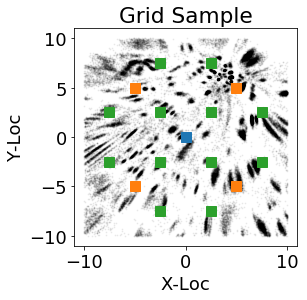

In [23]:
plt.figure(figsize=(4,4))
plt.scatter(dat2[pt_keep_grid,0]+off_x,dat2[pt_keep_grid,1]+off_y,color = 'k',alpha=.05,s=1)
g_0 = get_grid(0)
g_1 = get_grid(1)
g_2 = get_grid(2)
g_3 = get_grid(6)

MS = 10
plt.plot(g_0[:,0],g_0[:,1],'s',markersize=MS) # markerfacecolor='none'
plt.plot(g_1[:,0],g_1[:,1],'s',markersize=MS)
plt.plot(g_2[:,0],g_2[:,1],'s',markersize=MS)
plt.title('Grid Sample')
plt.xlabel('X-Loc')
plt.ylabel('Y-Loc')
# plt.plot(g_3[:,0],g_3[:,1],'.')
plt.plot()
plt.show()

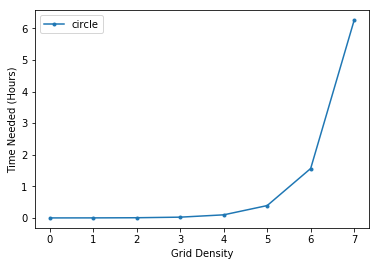

[  3.81790774e-04   1.52716310e-03   6.10865238e-03   2.44346095e-02
   9.77384381e-02   3.90953752e-01   1.56381501e+00   6.25526004e+00]


192

In [30]:
# assume 1.75s/sec
grid_density = np.arange(8.0)
n_pts = 4**grid_density
time_needed = n_pts/60/60*1.75
time_needed_circle = time_needed*np.pi/4
#plt.plot(grid_density,time_needed,'.-',label='square')
plt.plot(grid_density,time_needed_circle,'.-',label='circle')
plt.xlabel('Grid Density')
# plt.ylabel('N Samples')
plt.ylabel('Time Needed (Hours)')
plt.legend()
plt.show()
print(time_needed_circle)

16000/83

In [24]:
def shift_back(dat,off_x=5,off_y=5):
    dat[:,0] = dat[:,0]-off_x
    dat[:,1] = dat[:,1]-off_x
    return dat


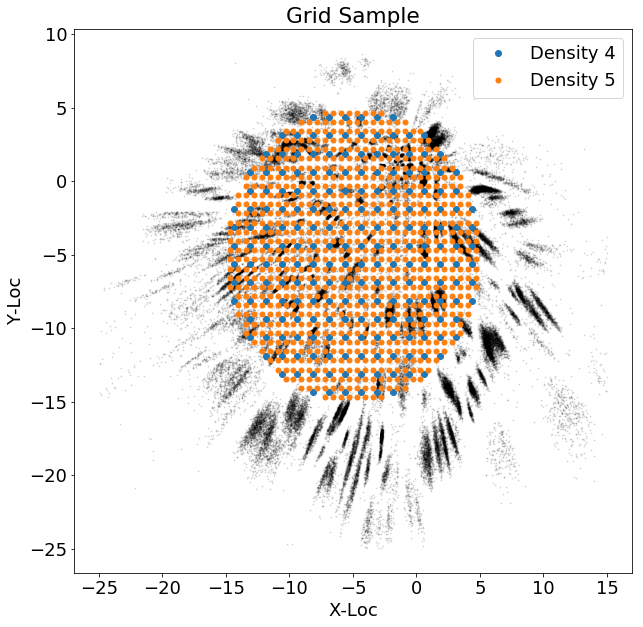

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(dat2[pt_keep,0],dat2[pt_keep,1],color = 'k',alpha=.1,s=1)

# g_0 = get_grid(0)
g_1 = shift_back(get_grid(4))
# g_2 = get_grid(2)
g_4 = shift_back(get_grid(5))
g_5 = shift_back(get_grid(7))


plt.plot(g_1[:,0],g_1[:,1],'o',label = 'Density 4')
plt.plot(g_4[:,0],g_4[:,1],'.',markersize=10,label = 'Density 5')
plt.legend()
plt.title('Grid Sample')
plt.xlabel('X-Loc')
plt.ylabel('Y-Loc')
plt.show()

In [26]:
g_0 = shift_back(get_grid(0))
g_1 = shift_back(get_grid(1))
g_2 = shift_back(get_grid(2))
g_3 = shift_back(get_grid(3))
g_4 = shift_back(get_grid(4))
g_5 = shift_back(get_grid(5))
g_6 = shift_back(get_grid(6))
g_7 = shift_back(get_grid(7))
g_8 = shift_back(get_grid(8))

In [828]:
np.savez('search_locs',g_0=g_0,g_1=g_1,g_2=g_2,g_3=g_3,g_4=g_4,g_5=g_5,g_6=g_6,g_7=g_7,g_8=g_8)

In [830]:
np.shape(g_6)

(3228, 2)

In [827]:
51000/60/60*1.75

24.5

In [28]:
g_8[01.638]

array([-4.9609375, -4.9609375])